# Alisha Coffey


## Observations and Insights 

1. Capomulin and Ramicane had the most measurements taken, however all drugs had over 100 measurements taken
2. Mice treated with Ceftamin and Infubinol had larger/heavier tumors after treatment than those treated with Capomulin and Ramicane.
3. According to trends in Capomulin-treated mice, Tumor Volume is highly correlated with mouse weight.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
mouse_metadata["Mouse ID"].value_counts()

a699    1
a444    1
m546    1
d251    1
c832    1
       ..
n364    1
b559    1
x822    1
k754    1
w697    1
Name: Mouse ID, Length: 249, dtype: int64

In [2]:
study_results.head()
study_results["Mouse ID"].value_counts()

g989    13
v923    10
t718    10
y793    10
p189    10
        ..
x336     1
h428     1
x226     1
f932     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Combine the data into a single dataset
tog = study_results.merge(mouse_metadata, on="Mouse ID")
# Display the data table for preview

tog.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
print("Number of mice: " + str(len(tog["Mouse ID"].unique())))

Number of mice: 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

tog["Duplicated?"] = tog.duplicated(subset=["Mouse ID","Timepoint"],keep=False)

tog.loc[tog["Duplicated?"]==True,]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated?
860,g989,0,45.000000,0,Propriva,Female,21,26,True
861,g989,0,45.000000,0,Propriva,Female,21,26,True
862,g989,5,48.786801,0,Propriva,Female,21,26,True
863,g989,5,47.570392,0,Propriva,Female,21,26,True
864,g989,10,51.745156,0,Propriva,Female,21,26,True
865,g989,10,49.880528,0,Propriva,Female,21,26,True
866,g989,15,51.325852,1,Propriva,Female,21,26,True
867,g989,15,53.442020,0,Propriva,Female,21,26,True
868,g989,20,55.326122,1,Propriva,Female,21,26,True
869,g989,20,54.657650,1,Propriva,Female,21,26,True


In [6]:
### getting the duplicate mouse ids so can remove all data that are associated with it
dups = tog.loc[tog["Duplicated?"]==True,["Mouse ID"]]["Mouse ID"].unique()
dups

array(['g989'], dtype=object)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

### removing all data for g989
tog_nodups = tog.loc[tog["Mouse ID"] != dups[0],:]

In [8]:
# Checking the number of mice in the clean DataFrame.
print("Number of mice (duplicates removed): {}".format(len(tog_nodups["Mouse ID"].unique())))

Number of mice (duplicates removed): 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tog_grouped = tog_nodups.groupby(["Drug Regimen"])

drug_mean = pd.Series(tog_grouped["Tumor Volume (mm3)"].mean())
drug_median = pd.Series(tog_grouped.median()["Tumor Volume (mm3)"])
drug_var = pd.Series(tog_grouped.var()["Tumor Volume (mm3)"]) 
drug_sd = pd.Series(tog_grouped["Tumor Volume (mm3)"].std())
drug_sem = pd.Series(tog_grouped["Tumor Volume (mm3)"].sem())

drug_summary_table = pd.DataFrame({"Mean" : drug_mean,
                                  "Median" : drug_median,
                                  "Variance" : drug_var,
                                  "Standard Deviation" : drug_sd,
                                  "SEM" : drug_sem})


drug_summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

tot_num = pd.DataFrame(tog_grouped["Mouse ID"].count())

tot_num

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


Text(0, 0.5, 'Number of Measurements')

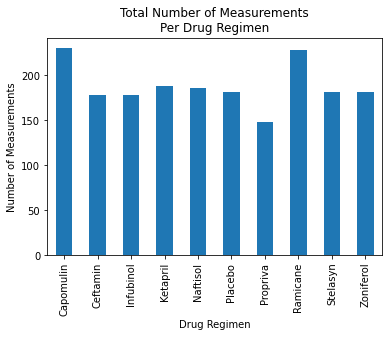

In [11]:
panda_plot = tot_num.plot(kind="bar", legend = False, title = "Total Number of Measurements\nPer Drug Regimen")
panda_plot.set_ylabel("Number of Measurements")

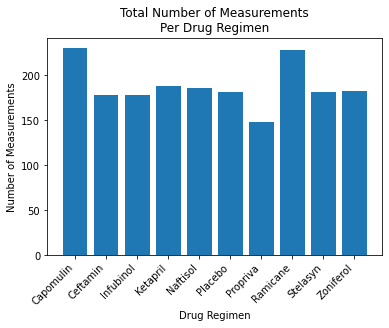

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
tot_num = tog_grouped["Mouse ID"].count()
tot_num = tot_num.to_numpy()

x_axis = np.arange(len(tot_num))

x_names = [tog_grouped["Mouse ID"].count().index]
#x_names
tick_locations = [value for value in x_axis]

plt.bar(x=x_axis, height = tot_num, label =x_names )
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 
                            'Placebo','Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],rotation = 45, ha="right")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements\nPer Drug Regimen")

plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
tog_grouped_sex = tog_nodups.groupby("Sex")
df = pd.DataFrame(tog_grouped_sex["Mouse ID"].count())
df

,Mouse ID
Sex,
Female,922
Male,958


Text(0, 0.5, '')

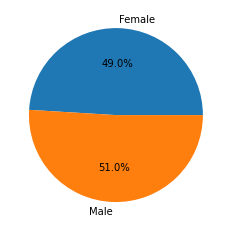

In [14]:
df_plot = df.plot(kind="pie", y = "Mouse ID", autopct='%1.1f%%', legend = False)
df_plot.set_ylabel("")

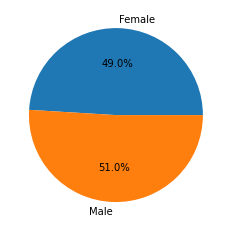

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df = tog_grouped_sex["Mouse ID"].count()
sex_num = df.to_numpy()

x_axis = np.arange(len(tot_num))

plt.pie(sex_num, labels =['Female','Male'],autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mouse_ids = []
final_vol = []
drug_ordered = []

drugs_of_interest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

for drug in drugs_of_interest:
    drug_df = tog_nodups.loc[tog_nodups["Drug Regimen"]==drug,]
    mice = drug_df["Mouse ID"].unique()
    
    for mouse in mice:
        drug_ordered.append(drug)
        temp = drug_df.loc[drug_df["Mouse ID"]== mouse,]
        max_timept = temp["Timepoint"].max()
        
        mouse_ids.append(mouse)
        idx = temp.loc[temp["Timepoint"]==max_timept,].index[0]
        vol = temp.loc[idx][2]
        final_vol.append(vol)
        

final_vol_df = pd.DataFrame({"Mouse ID" : mouse_ids,
                            "Final Tumor Volume (mm3)" : final_vol,
                            "Drug Regimen": drug_ordered})


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tog_merged = pd.merge(tog_nodups,final_vol_df,on="Mouse ID")
tog_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_x,Sex,Age_months,Weight (g),Duplicated?,Final Tumor Volume (mm3),Drug Regimen_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,False,38.982878,Capomulin
1,b128,5,45.651331,0,Capomulin,Female,9,22,False,38.982878,Capomulin
2,b128,10,43.270852,0,Capomulin,Female,9,22,False,38.982878,Capomulin
3,b128,15,43.784893,0,Capomulin,Female,9,22,False,38.982878,Capomulin
4,b128,20,42.731552,0,Capomulin,Female,9,22,False,38.982878,Capomulin
...,...,...,...,...,...,...,...,...,...,...,...
809,m601,25,33.118756,1,Capomulin,Male,22,17,False,28.430964,Capomulin
810,m601,30,31.758275,1,Capomulin,Male,22,17,False,28.430964,Capomulin
811,m601,35,30.834357,1,Capomulin,Male,22,17,False,28.430964,Capomulin
812,m601,40,31.378045,1,Capomulin,Male,22,17,False,28.430964,Capomulin


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

### See previous cell


outliers = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drugs_of_interest:
    temp = final_vol_df.loc[final_vol_df["Drug Regimen"]==drug,].reset_index()
    quarts = temp["Final Tumor Volume (mm3)"].quantile([0.25,0.75])
    iqr = quarts[0.75]-quarts[0.25]
    low_bound = quarts[0.25] - (iqr*1.5)
    up_bound = quarts[0.75] - (iqr*1.5)
    
    for n in range(len(temp)):
        if temp["Final Tumor Volume (mm3)"][n] < low_bound:# or (temp.loc["Final Tumor Volume (mm3)"][n] > up_bound):
            outliers.append(temp["Mouse ID"][n])
    


final_vol_df["Outlier?"] = "No"   
final_vol_df.loc[final_vol_df["Mouse ID"] == outliers[0],["Outlier?"]]="Yes"
final_vol_df

,Mouse ID,Final Tumor Volume (mm3),Drug Regimen,Outlier?
0,b128,38.982878,Capomulin,No
1,j246,38.753265,Capomulin,No
2,r554,32.377357,Capomulin,No
3,s185,23.343598,Capomulin,No
4,b742,38.939633,Capomulin,No
...,...,...,...,...
95,p438,61.433892,Ceftamin,No
96,b487,56.057749,Ceftamin,No
97,o287,59.741901,Ceftamin,No
98,q483,64.192341,Ceftamin,No


<AxesSubplot:title={'center':'Final Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

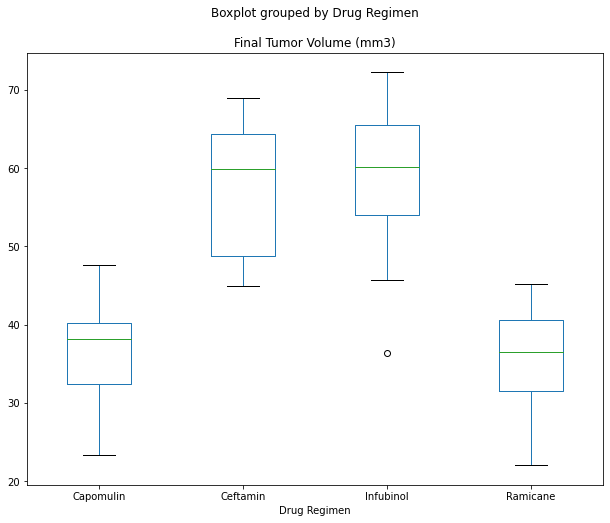

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_vol_df.boxplot(column="Final Tumor Volume (mm3)",by="Drug Regimen",grid=False, figsize=(10,8))

## Line and Scatter Plots

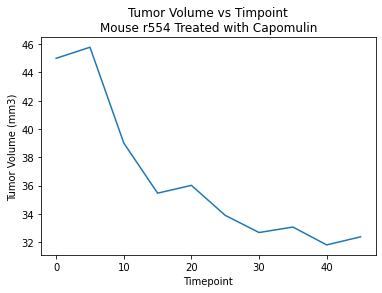

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
r554 = tog_nodups.loc[tog_nodups["Mouse ID"]=="r554",]
plt.plot(r554["Timepoint"],r554["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs Timpoint\nMouse r554 Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
#plt.figure(figsize=(9,8))
plt.show()

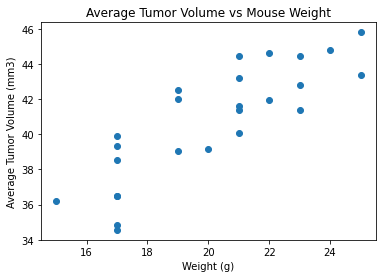

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap = tog_nodups.loc[tog_nodups["Drug Regimen"]=="Capomulin",].groupby("Mouse ID").mean()
#cap
plt.scatter(cap["Weight (g)"], cap["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
#plt.figure(figsize=(9,8))
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr= st.pearsonr(cap["Weight (g)"], cap["Tumor Volume (mm3)"])
corr


(0.8419363424694717, 1.322572243471279e-07)

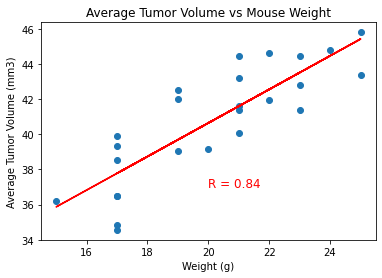

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap["Weight (g)"], cap["Tumor Volume (mm3)"])
regress_values = cap["Weight (g)"] * slope + intercept

plt.scatter(cap["Weight (g)"], cap["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(cap["Weight (g)"],regress_values,"r-")
plt.annotate("R = " + str(round(corr[0],2)),(20,37),fontsize=12,color="red")
plt.show()